<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

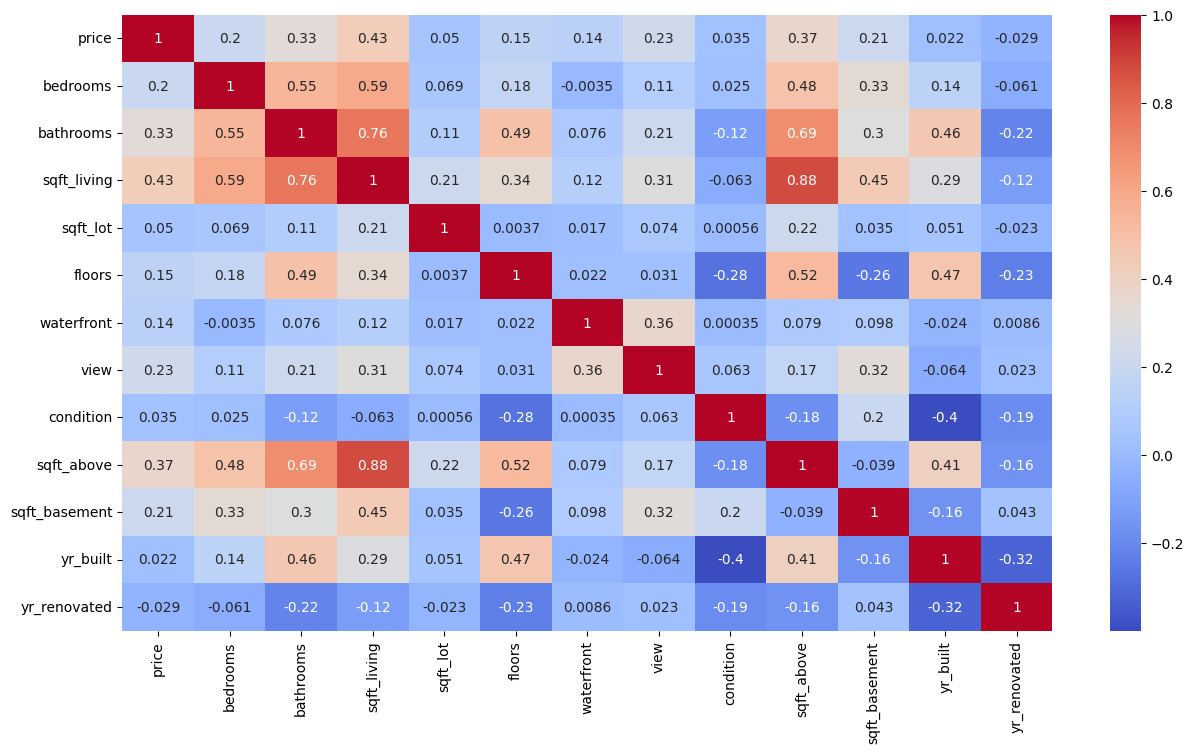

size before removing outlier (4600, 11)
size after removing outlier (4244, 11)
x_train shape: (3450, 10)
x_test shape: (1150, 10)
y_train shape: (3450,)
y_test shape: (1150,)
Random Forest

mse 2.548268917029055


r2 0.03843316927645868


mae 0.36319141754950984
Decision Tree

mse 2.764789015661092


r2 -0.04326878283630675


mae 0.468635838450033
KNN

mse 2.5425388054318936


r2 0.040595376416903806


mae 0.3695491714940551
Linear Regression

mse 2.533459940784301


r2 0.04402120602515869


mae 0.3686465126492618


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                    #import library for perform a pricing prediction


df = pd.read_csv('data.csv')             #reading a data fully
df.head(5) #this is for see the data
df.info()  #for dtype checking for each column

df.shape               #shape of data of rows and column
df.isnull().sum()      # number of null value
df.nunique()           #present of unique value
df.describe()



numerical_df = df.select_dtypes(include=np.number)       #perform seaborn plot diagram based on numerical value
plt.figure(figsize=(15, 8))
sns.heatmap(numerical_df.corr(), annot=True,cmap = 'coolwarm')
plt.show()

columnr = ['date','street','city','statezip','country','yr_renovated','yr_built']  #removal of unwanted data

df = df.drop(columns = columnr)
df.head()

import scipy.stats as stats
z_scores = stats.zscore(df)
thershold = 3
print("size before removing outlier",df.shape)
outlier = df[(z_scores > thershold).any(axis=1)] #outlier removal
new = df[(z_scores < thershold).all(axis=1)]  #new data
print("size after removing outlier",new.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)
scaled_data = scaler.transform(df)                      # convert different unit into an same unit for example - cm,mm,m -> mm
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor       #import different algorithm

x = scaled_df.drop('price',axis=1)
y = scaled_df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

models = [
         ('Random Forest',RandomForestRegressor()),
         ('Decision Tree',DecisionTreeRegressor()),
         ('KNN',KNeighborsRegressor()),
         ('Linear Regression',LinearRegression())
]

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

for name,model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    print("mse",mse)    #mse - mean square method
    print('\n')
    r2 = r2_score(y_test,y_pred)
    print("r2",r2)      #R-squared
    print('\n')
    mae = mean_absolute_error(y_test,y_pred)
    print("mae",mae)     #mean absoulte method